### Страйды и паддинги

#### Stride - параметр, отвечающий за шаг свертки. Padding задает отступ

In [1]:
import warnings
warnings.filterwarnings('ignore')

from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [2]:
np.set_printoptions(precision=2)

In [3]:
img = np.array([[120,140,143,250,80],
                [ 54,160,140,220,70],
                [ 30,170,130,200,60]], dtype=np.uint8)

In [4]:
img = np.divide(img,255).astype(np.float32)

In [5]:
img

array([[0.47, 0.55, 0.56, 0.98, 0.31],
       [0.21, 0.63, 0.55, 0.86, 0.27],
       [0.12, 0.67, 0.51, 0.78, 0.24]], dtype=float32)

<AxesSubplot:>

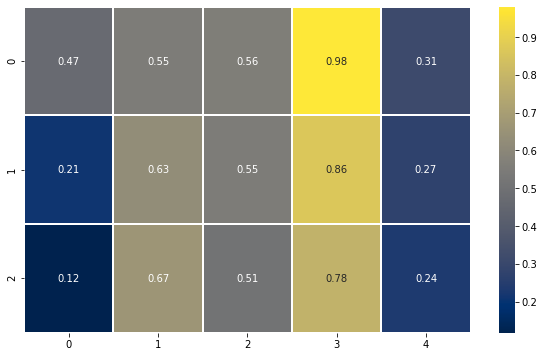

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.heatmap(img,annot=True, linewidth=1, cmap='cividis', ax=ax)

In [7]:
img4process = np.expand_dims(img,axis=[0,3])

In [8]:
def convolution_result(conv:keras.layers.Conv2D,image:np.ndarray):
    """Выполнить свертку изображения image с помощью свертки conv"""
    conv_out = conv(image)
    weights = conv.get_weights()[0]
    weights = np.array(weights)
    rows, cols = weights.shape[0], weights.shape[1]
    weights = np.reshape(weights,newshape=(rows,cols))
    conv_out = conv_out.numpy()
    conv_out = np.squeeze(conv_out,axis=0)
    conv_out = np.squeeze(conv_out,axis=2)
    return conv_out, weights

#### Свертка - Conv2D

* Эксперименты с различными размерами ядер свертки

In [9]:
conv1 = keras.layers.Conv2D(filters=1,kernel_size=3, strides=(1, 1))
conv2 = keras.layers.Conv2D(filters=1,kernel_size=(3,2), strides=(1, 1))
conv3 = keras.layers.Conv2D(filters=1,kernel_size=(2,3), strides=(1, 1))

In [10]:
conv_out1, weights1 = convolution_result(conv1,img4process)
conv_out2, weights2 = convolution_result(conv2,img4process)
conv_out3, weights3 = convolution_result(conv3,img4process)

In [11]:
weights1

array([[ 0.11, -0.45, -0.11],
       [-0.44, -0.52, -0.29],
       [ 0.19, -0.15,  0.5 ]], dtype=float32)

In [12]:
weights2

array([[-0.28,  0.29],
       [ 0.5 ,  0.37],
       [ 0.2 , -0.25]], dtype=float32)

In [13]:
weights3

array([[ 0.42, -0.47, -0.59],
       [-0.66, -0.62,  0.22]], dtype=float32)

Text(0.5, 1.0, 'Ksize = (2x3)')

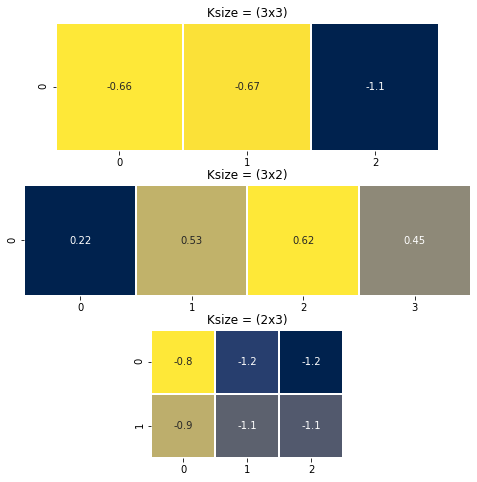

In [14]:
rows, cols = 3, 1
fig, axs = plt.subplots(rows, cols, figsize=(8,8))
sns.heatmap(conv_out1, annot=True, linewidth=1, cmap='cividis', square=True, cbar=False, ax=axs[0])
sns.heatmap(conv_out2, annot=True, linewidth=1, cmap='cividis', square=True, cbar=False, ax=axs[1])
sns.heatmap(conv_out3, annot=True, linewidth=1, cmap='cividis', square=True, cbar=False, ax=axs[2])
axs[0].set_title("Ksize = (3x3)")
axs[1].set_title("Ksize = (3x2)")
axs[2].set_title("Ksize = (2x3)")

In [15]:
img

array([[0.47, 0.55, 0.56, 0.98, 0.31],
       [0.21, 0.63, 0.55, 0.86, 0.27],
       [0.12, 0.67, 0.51, 0.78, 0.24]], dtype=float32)

In [16]:
c1, c2, c3 = img[:,0:3], img[:,1:4], img[:,2:]
display(c1,c2,c3)

array([[0.47, 0.55, 0.56],
       [0.21, 0.63, 0.55],
       [0.12, 0.67, 0.51]], dtype=float32)

array([[0.55, 0.56, 0.98],
       [0.63, 0.55, 0.86],
       [0.67, 0.51, 0.78]], dtype=float32)

array([[0.56, 0.98, 0.31],
       [0.55, 0.86, 0.27],
       [0.51, 0.78, 0.24]], dtype=float32)

In [17]:
s1 = weights1*c1
s2 = weights1*c2
s3 = weights1*c3
res = np.array([s1.sum(), s2.sum(), s3.sum()])
display(res)
conv_out1

array([-0.66, -0.67, -1.09], dtype=float32)

array([[-0.66, -0.67, -1.09]], dtype=float32)

<AxesSubplot:>

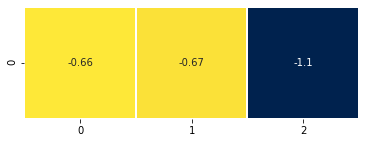

In [18]:
sns.heatmap(conv_out1, annot=True, linewidth=1, cmap='cividis', square=True, cbar=False)

In [19]:
c1, c2, c3, c4 = img[:,0:2], img[:,1:3], img[:,2:4], img[:,3:]
display(c1,c2,c3,c4)

array([[0.47, 0.55],
       [0.21, 0.63],
       [0.12, 0.67]], dtype=float32)

array([[0.55, 0.56],
       [0.63, 0.55],
       [0.67, 0.51]], dtype=float32)

array([[0.56, 0.98],
       [0.55, 0.86],
       [0.51, 0.78]], dtype=float32)

array([[0.98, 0.31],
       [0.86, 0.27],
       [0.78, 0.24]], dtype=float32)

In [20]:
s1 = weights2*c1
s2 = weights2*c2
s3 = weights2*c3
s4 = weights2*c4
res = np.array([s1.sum(), s2.sum(), s3.sum(), s4.sum()])
display(res)
conv_out2

array([0.22, 0.53, 0.62, 0.45], dtype=float32)

array([[0.22, 0.53, 0.62, 0.45]], dtype=float32)

<AxesSubplot:>

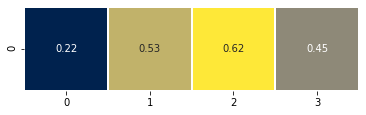

In [21]:
sns.heatmap(conv_out2, annot=True, linewidth=1, cmap='cividis', square=True, cbar=False)

In [22]:
c1, c2, c3 = img[0:2,0:3], img[0:2,1:4],img[0:2:,2:]
c4, c5, c6 = img[1:, 0:3], img[1:,1:4], img[1:,2:]

In [23]:
s1 = weights3*c1
s2 = weights3*c2
s3 = weights3*c3
s4 = weights3*c4
s5 = weights3*c5
s6 = weights3*c6
res = np.array([[s1.sum(), s2.sum(),s3.sum()],
                [s4.sum(), s5.sum(),s6.sum()]])
display(res)
conv_out3

array([[-0.8 , -1.17, -1.24],
       [-0.9 , -1.08, -1.1 ]], dtype=float32)

array([[-0.8 , -1.17, -1.24],
       [-0.9 , -1.08, -1.1 ]], dtype=float32)

<AxesSubplot:>

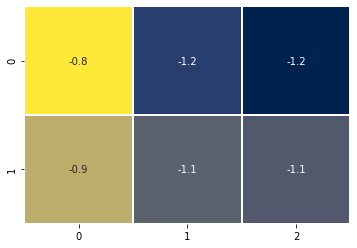

In [24]:
sns.heatmap(conv_out3, annot=True, linewidth=1, cmap='cividis', square=True, cbar=False)

* Strides

stride - два числа (1,1) по умолчанию  
первое число - "перешагивание" через столбцы  
второе число - "перешагивание" через строки 

In [25]:
conv1 = keras.layers.Conv2D(filters=1,kernel_size=3,strides=(1, 2))
conv2 = keras.layers.Conv2D(filters=1,kernel_size=3,strides=(2, 1))

In [26]:
conv_out1, weights1 = convolution_result(conv1,img4process)
conv_out2, weights2 = convolution_result(conv2,img4process)

In [27]:
weights1

array([[-0.14, -0.53, -0.34],
       [ 0.41,  0.27, -0.04],
       [-0.17, -0.36, -0.12]], dtype=float32)

In [28]:
img

array([[0.47, 0.55, 0.56, 0.98, 0.31],
       [0.21, 0.63, 0.55, 0.86, 0.27],
       [0.12, 0.67, 0.51, 0.78, 0.24]], dtype=float32)

In [29]:
# Пропускаем второй столбец

In [30]:
c1, c2 = img[:,0:3], img[:,2:]
display(c1,c2)

array([[0.47, 0.55, 0.56],
       [0.21, 0.63, 0.55],
       [0.12, 0.67, 0.51]], dtype=float32)

array([[0.56, 0.98, 0.31],
       [0.55, 0.86, 0.27],
       [0.51, 0.78, 0.24]], dtype=float32)

In [31]:
s1 = weights1*c1
s2 = weights1*c2
res = np.array([s1.sum(), s2.sum()])
display(res)
conv_out1

array([-0.63, -0.66], dtype=float32)

array([[-0.63, -0.66]], dtype=float32)

In [32]:
# Не хватает строк, для пропуска

In [33]:
weights2

array([[ 0.03,  0.32,  0.36],
       [ 0.51,  0.27,  0.56],
       [ 0.52,  0.12, -0.5 ]], dtype=float32)

In [34]:
img

array([[0.47, 0.55, 0.56, 0.98, 0.31],
       [0.21, 0.63, 0.55, 0.86, 0.27],
       [0.12, 0.67, 0.51, 0.78, 0.24]], dtype=float32)

In [35]:
c1, c2, c3 = img[:,0:3], img[:,1:4], img[:,2:]
display(c1,c2,c3)

array([[0.47, 0.55, 0.56],
       [0.21, 0.63, 0.55],
       [0.12, 0.67, 0.51]], dtype=float32)

array([[0.55, 0.56, 0.98],
       [0.63, 0.55, 0.86],
       [0.67, 0.51, 0.78]], dtype=float32)

array([[0.56, 0.98, 0.31],
       [0.55, 0.86, 0.27],
       [0.51, 0.78, 0.24]], dtype=float32)

In [36]:
s1 = weights2*c1
s2 = weights2*c2
s3 = weights2*c3
res = np.array([[s1.sum(), s2.sum(), s3.sum()]])
display(res)
conv_out2

array([[0.86, 1.51, 1.35]], dtype=float32)

array([[0.86, 1.51, 1.35]], dtype=float32)

* Padding

valid - выполняет обычеую свертку в соответствии с размером свертки  
same - возвращает изображение такого же размера, добавляя к границам нули

In [37]:
conv11 = keras.layers.Conv2D(filters=1,kernel_size=3, strides=(1, 1), padding="valid")
conv12 = keras.layers.Conv2D(filters=1,kernel_size=3, strides=(1, 1), padding="same")

In [38]:
conv_out11, weights11 = convolution_result(conv11,img4process)
conv_out12, weights12 = convolution_result(conv12,img4process)

In [39]:
conv_out11

array([[-0.55, -0.23, -0.47]], dtype=float32)

In [40]:
c1, c2, c3 = img[:,0:3], img[:,1:4], img[:,2:]
s1 = weights11*c1
s2 = weights11*c2
s3 = weights11*c3
res = np.array([s1.sum(), s2.sum(), s3.sum()])
display(res)
conv_out11

array([-0.55, -0.23, -0.47], dtype=float32)

array([[-0.55, -0.23, -0.47]], dtype=float32)

In [41]:
img

array([[0.47, 0.55, 0.56, 0.98, 0.31],
       [0.21, 0.63, 0.55, 0.86, 0.27],
       [0.12, 0.67, 0.51, 0.78, 0.24]], dtype=float32)

In [42]:
# Первая строка
c11 = np.array([[0, 0,    0],
                [0, 0.47, 0.55],
                [0, 0.21, 0.63]])

c12 = np.array([[0,    0,    0],
                [0.47, 0.55, 0.56],
                [0.21, 0.63, 0.55]])

c13 = np.array([[0,    0,    0],
                [0.55, 0.56, 0.98],
                [0.63, 0.55, 0.86]])

c14 = np.array([[0,    0,    0],
                [0.56, 0.98, 0.31],
                [0.55, 0.86, 0.27]]),

c15 = np.array([[0,    0,    0],
                [0.98, 0.31, 0],
                [0.86, 0.27, 0]]),
# Вторая строка
c21 = np.array([[0, 0.47, 0.55],
                [0, 0.21, 0.63],
                [0, 0.12, 0.67]]),

c22 = np.array([[0.47, 0.55, 0.56],
                [0.21, 0.63, 0.55],
                [0.12, 0.67, 0.51]]),

c23 = np.array([[0.55, 0.56, 0.98],
                [0.63, 0.55, 0.86],
                [0.67, 0.51, 0.78]]),

c24 = np.array([[0.56, 0.98, 0.31],
                [0.55, 0.86, 0.27],
                [0.51, 0.78, 0.24]]),

c25 = np.array([[0.98, 0.31, 0],
                [0.86, 0.27, 0],
                [0.78, 0.24, 0]])
# Третья строка
c31 = np.array([[0, 0.21, 0.63],
                [0, 0.12, 0.67],
                [0, 0,    0]]),

c32 = np.array([[0.21, 0.63, 0.55],
                [0.12, 0.67, 0.51],
                [0,    0,    0]]),

c33 = np.array([[0.63, 0.55, 0.86],
                [0.67, 0.51, 0.78],
                [0,    0,    0]]),

c34 = np.array([[0.55, 0.86, 0.27],
                [0.51, 0.78, 0.24],
                [0,    0,    0]]),

c35 = np.array([[0.86, 0.27, 0],
                [0.78, 0.24, 0],
                [0,    0,    0]])

In [43]:
s11 = weights12*c11
s12 = weights12*c12
s13 = weights12*c13
s14 = weights12*c14
s15 = weights12*c15

s21 = weights12*c21
s22 = weights12*c22
s23 = weights12*c23
s24 = weights12*c24
s25 = weights12*c25

s31 = weights12*c31
s32 = weights12*c32
s33 = weights12*c33
s34 = weights12*c34
s35 = weights12*c35

In [44]:
res = np.array([[s11.sum(), s12.sum(), s13.sum(), s14.sum(), s15.sum()],
                [s21.sum(), s22.sum(), s23.sum(), s24.sum(), s25.sum()],
                [s31.sum(), s32.sum(), s33.sum(), s34.sum(), s35.sum()]])

In [45]:
display(res)
conv_out12

array([[0.26, 0.38, 0.96, 0.23, 0.79],
       [0.73, 0.8 , 1.73, 1.15, 1.43],
       [0.52, 0.77, 1.46, 1.12, 1.03]])

array([[0.26, 0.38, 0.96, 0.23, 0.79],
       [0.73, 0.8 , 1.73, 1.15, 1.44],
       [0.52, 0.77, 1.46, 1.12, 1.03]], dtype=float32)